# Dividir el dataset en conjunto de entrenamiento y de testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([ 4.,  5., 19., 29., 40., 39., 31., 24.,  5.,  4.]),
 array([-2.46178016, -1.96447425, -1.46716834, -0.96986243, -0.47255651,
         0.0247494 ,  0.52205531,  1.01936122,  1.51666713,  2.01397304,
         2.51127895]),
 <BarContainer object of 10 artists>)

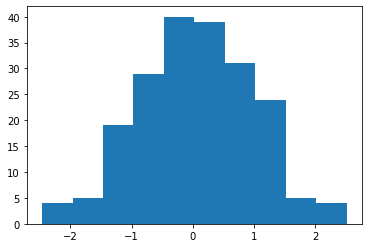

In [4]:
plt.hist(a)

In [5]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [6]:
len(training), len(testing)

(155, 45)

In [7]:
import statsmodels.formula.api as smf

In [8]:
lm = smf.ols(formula="Sales~TV+Radio", data = training).fit()

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     595.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.22e-72
Time:                        20:30:19   Log-Likelihood:                -304.88
No. Observations:                 155   AIC:                             615.8
Df Residuals:                     152   BIC:                             624.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9670      0.347      8.543      0.000       2.281       3.653
TV             0.0459      0.002     27.985      0.000       0.043       0.049
Radio          0.1820      0.009     19.412      0.000       0.164       0.201
==============================================================================
Omnibus:                       48.803   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.472
Skew:                          -1.341   Prob(JB):                     2.29e-25
Kurtosis:                       6.221   Cond. No.                         420.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Sales = 2.967 + 0.0459*TV + 0.1820*Radio


## Validación del modelo con el conjunto de testing

In [10]:
sales_pred = lm.predict(testing)
sales_pred

11     17.197939
15     20.625688
22      6.467681
26     14.864655
31     11.320384
36     23.200044
40     16.328078
42     21.495691
44      8.798263
49      8.169796
52     20.498085
54     20.276563
58     21.678947
61     22.742572
64     16.780132
67     12.005141
75     11.698271
80     11.336729
82     10.121163
90     10.027913
96     12.680701
97     15.282986
101    23.189827
102    17.676318
106     6.117723
112    13.840983
128    22.006100
136    11.242325
137    20.800044
140     9.433165
143     8.809295
159    12.365986
160    14.185493
165    14.357472
169    17.955667
170     7.375303
172     7.526216
174    13.801667
180    10.633562
187    16.969465
190    12.263089
191     8.400997
193    18.274356
194    16.323842
196     8.185949
dtype: float64

In [11]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

95.56605897618222

In [12]:
RSE = np.sqrt(SSD/(len(testing-2-1)))
RSE

1.4572886465867754

In [13]:
RSE/np.mean(testing["Sales"])

0.09957180245430443

![Alt text](image.png)